In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

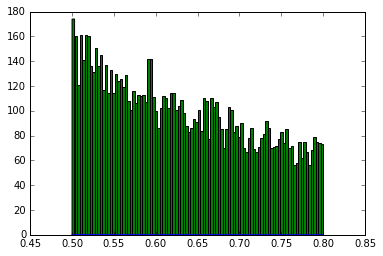

In [67]:
def chabrier(m_min, m_max, res):
    masses = np.linspace(m_min, m_max, res)
    sigma = .158/masses * np.exp(-(np.log10(masses)-np.log10(.08))**2/(2*.69**2))
    return sigma

test = chabrier(.5, .8, 1000)
masses = np.linspace(.5, .8, 1000)
plt.plot(masses, test)

randmasses = np.random.choice(masses, 10000, p = test/np.sum(test))
n, bins, patches = plt.hist(randmasses, bins = 100)

[ 0.04655511 -1.8113639 ]


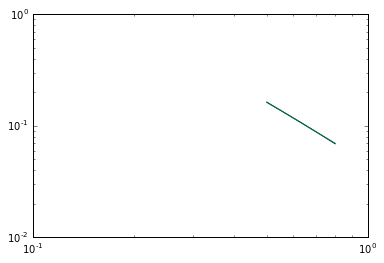

In [68]:
plt.loglog(masses,test)
#plt.loglog(bins[:-1], n/10000, '.')
error = np.sqrt(test)


lstest = scipy.optimize.least_squares(lambda x: x[0]*masses**x[1] - test, [1,1])
print(lstest.x)

plt.loglog(masses, lstest.x[0]*masses**lstest.x[1])

In [72]:
def powerlawmodel(theta, masses):
    model = theta[0]*masses**(-theta[1])
    return model

def logL(theta, x,y, sigma):
    return -.5*np.sum((y-powerlawmodel(theta,x))**2./(error)**2.)

def lnprior(theta):
    if theta[0] < 0:
        return -np.inf
    if theta[1] < 0:
        return -np.inf
    else:
        return 1.

def lnprob(theta, x, y, sigma):
    return lnprior(theta) + logL(theta, x, y, sigma)

import emcee

ndim, nwalkers = 2, 100
pos = [1+1e-2*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = [masses,test, error])
sampler.run_mcmc(pos, 5000);


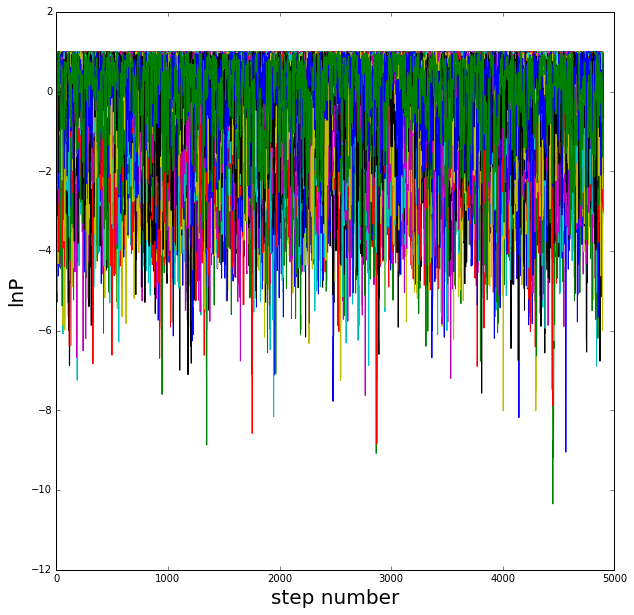

In [73]:
plt.figure(figsize = (10,10))
[plt.plot(sampler.lnprobability[i,100:]) for i in range(100)]
plt.xlabel('step number', fontsize = 20)
plt.ylabel('lnP', fontsize = 20)

constant_mean = 0.0532039910129
constant_std = 0.0173427994363
alpha_mean = 1.60620864263
alpha_std = 0.69503922587


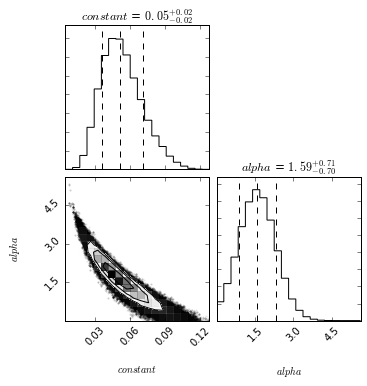

In [74]:
import corner

samples = sampler.chain[:,100:, :].reshape((-1, ndim))
corner.corner(samples, labels=['$constant$', '$alpha$'], fontsize = 30, show_titles = True, quantiles=[0.16, 0.5, 0.84])


print('constant_mean = %s' %(np.mean(samples[:,0])))
print('constant_std = %s' %(np.std(samples[:,0])))
print('alpha_mean = %s' %(np.mean(samples[:,1])))
print('alpha_std = %s' %(np.std(samples[:,1])))

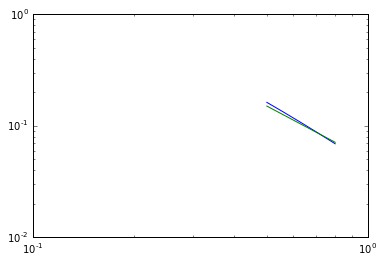

In [76]:
plt.loglog(masses,test)
plt.loglog(masses, .05*masses**(-1.59))